**##13th Jan##**

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Topmentor/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [4]:
data.shape

(600, 6)

In [5]:
data.isnull().sum()

,0
Undergrad,0
Marital.Status,0
Taxable.Income,0
City.Population,0
Work.Experience,0
Urban,0


In [6]:
data.isnull().sum()>0

,0
Undergrad,False
Marital.Status,False
Taxable.Income,False
City.Population,False
Work.Experience,False
Urban,False


In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0


In [ ]:
data.dtypes

,0
Undergrad,object
Marital.Status,object
Taxable.Income,int64
City.Population,int64
Work.Experience,int64
Urban,object


In [7]:
data[["Undergrad", "Marital.Status", "Urban"]].value_counts()

Undergrad  Marital.Status  Urban
YES        Single          YES      62
                           NO       55
NO         Single          YES      54
           Divorced        NO       53
YES        Married         YES      53
           Divorced        NO       50
           Married         NO       50
NO         Married         YES      47
           Single          NO       46
           Divorced        YES      44
           Married         NO       44
YES        Divorced        YES      42
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
print(label_encoder)

LabelEncoder()


In [14]:
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

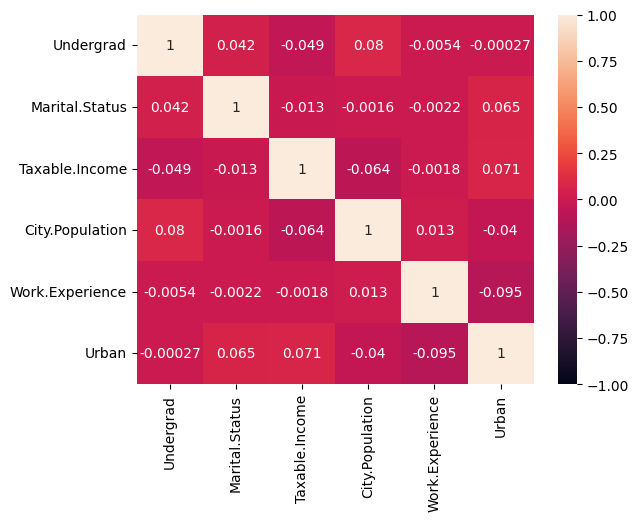

In [15]:
sns.heatmap(data.corr(),vmin=-1,annot=True)
plt.show()

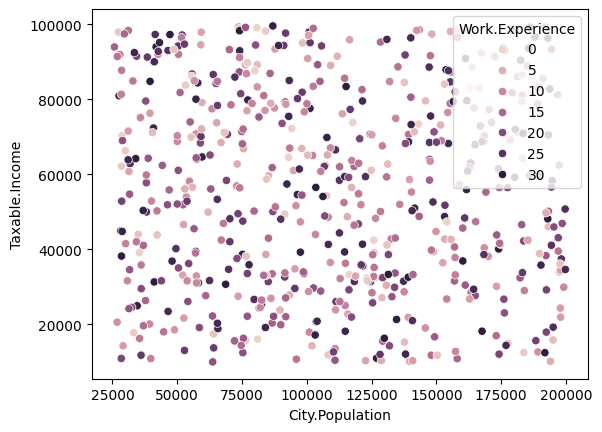

In [16]:
sns.scatterplot(x = data["City.Population"], y = data["Taxable.Income"], hue = data["Work.Experience"])
plt.show()

In [20]:
!pip install import-ipynb

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [48]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import import_ipynb
from sklearn.model_selection import train_test_split

In [33]:
x,y = make_classification(n_samples=3000, n_features=10,n_classes=2, random_state=42)
print(x.shape)
print(y.shape)
print(x)

(3000, 10)
(3000,)
[[-0.18772702  0.86392355 -0.85097508 ... -0.97462066 -0.19090562
   0.76913578]
 [-0.09395237  1.28548695 -0.20478526 ... -1.31396937  0.62901759
  -1.20481434]
 [ 0.42196882 -1.74070061  0.22012919 ...  0.51843965 -0.00389145
  -0.39907054]
 ...
 [-0.30368819  0.35854771 -1.10189997 ...  0.98418038 -0.66367139
   0.03466143]
 [ 1.30628048 -0.80380318 -0.21761542 ... -0.54974229  0.40903588
   0.58599177]
 [ 0.7972523   1.3964657   0.4121143  ... -0.46673745  0.01237179
  -2.07715966]]


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=123)

In [35]:
x_train.shape

(2400, 10)

In [40]:
RandomForest_model = RandomForestClassifier()
decisiontree_model = DecisionTreeClassifier()

In [41]:
RandomForest_model.fit(x_train, y_train)
decisiontree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.9866666666666667


In [53]:
y_pred_randomforest = RandomForest_model.predict(x_test)
y_pred_decisiontree = decisiontree_model.predict(x_test)

In [55]:
confusion_matrix(y_test,y_pred_randomforest)

array([[295,   6],
       [  1, 298]])

In [56]:
confusion_matrix(y_test,y_pred_decisiontree)

array([[295,   6],
       [  7, 292]])

In [57]:
accuracy_score(y_test,y_pred_randomforest)

0.9883333333333333

In [58]:
accuracy_score(y_test,y_pred_decisiontree)

0.9783333333333334